In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [3]:
review_df= pd.read_csv("/content/drive/MyDrive/datasets/olist_order_reviews.csv")
display(review_df.head())
review_df.shape

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


(99224, 7)

In [4]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [5]:
# Separando em dois campos
review_data_title= review_df["review_comment_title"]
review_data= review_df.drop(["review_comment_title"], axis= 1)

In [6]:
# Excluindo os valores nulos
review_data= review_data.dropna()
review_data_title= review_data_title.dropna()

In [7]:
review_data= review_data.reset_index(drop= True)
display(review_data.head(3))
review_data.shape

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


(40977, 6)

In [8]:
review_data_title= review_data_title.reset_index(drop= True)
display(review_data_title.head(10))
review_data_title.shape

0                  recomendo
1            Super recomendo
2    Não chegou meu produto 
3                      Ótimo
4                 Muito bom.
5                        Bom
6               Maravilhoso!
7           Entrega perfeita
8                      Ótimo
9                   MT lindo
Name: review_comment_title, dtype: object

(11568,)

In [9]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
comments= []
stop_words= set(stopwords.words("portuguese"))

for words in review_data["review_comment_message"]:
  only_letters= re.sub("[^a-zA-Z]", " ", words)
  tokens= nltk.word_tokenize(only_letters)
  lower_case= [words.lower() for i in tokens]
  filtered_result= list(filter(lambda word: word not in stop_words, lower_case))
  comments.append(" ".join(filtered_result))

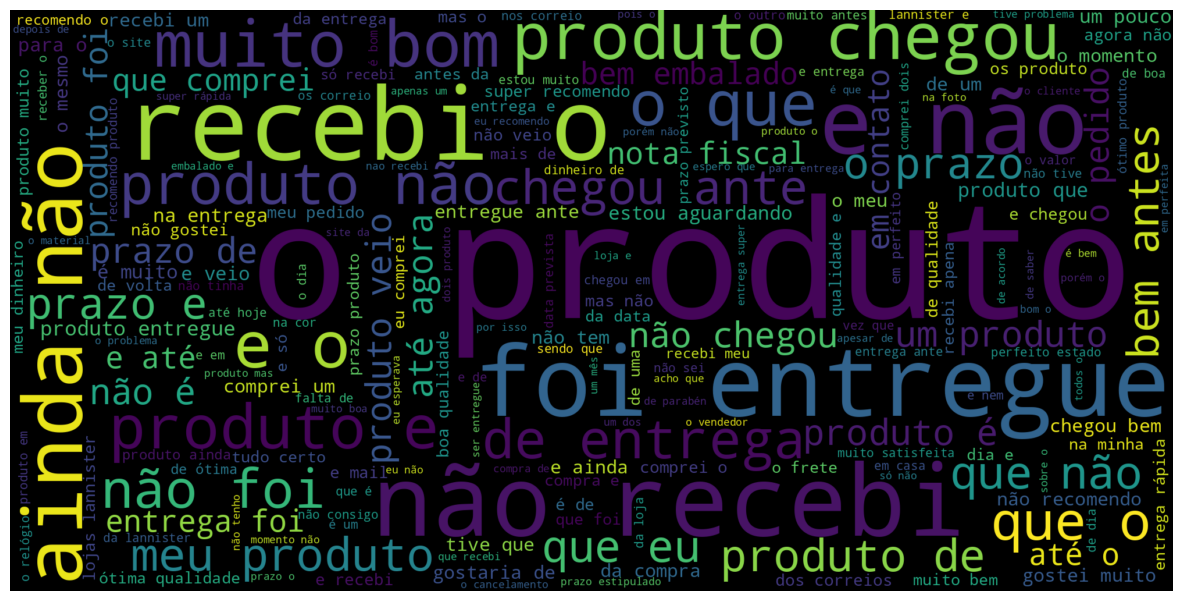

In [22]:
unique_string= (" ").join(comments)
wordcloud= WordCloud(width= 2000, height= 1000, background_color= "black").generate(unique_string)
plt.figure(figsize= (15, 9))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()